# Logistic Regression
***

### Table of Content
1. Predict with Linear Regression
2. Predict with Logsitic Regression
3. Examine and Compare Predictions (Hard Predictions versus Soft Predictions)
4. Model Evaluation
5. Explain how to interpret logistic regression coefficients

Let's do it! We'll learn about logistic regression by examining a glass dataset.

In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Get the glass dataset**

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['ri','na','mg','al','si','k','ca','ba','fe','glass_type']
df = pd.read_csv(url, names=col_names)
df.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


**Look at class labels**

Type of glass: (class attribute) http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.names

**Window Glass:**
- 1 building_windows_float_processed
- 2 building_windows_non_float_processed
- 3 vehicle_windows_float_processed
- 4 vehicle_windows_non_float_processed (none in this database)

**Non-Window Glass:**
- 5 containers
- 6 tableware
- 7 headlamps

In [3]:
# Display class values
df.glass_type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: glass_type, dtype: int64

**Convert the target feature into a binary feature (glass vs non-window glass)**

In [4]:
# glass_type 1, 2, 3 are window glass
# glass_type 5, 6, 7 are non-window glass
df['household'] = df.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
df.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0


**Let's plot Aluminum (al) vs household**

Text(0, 0.5, 'household')

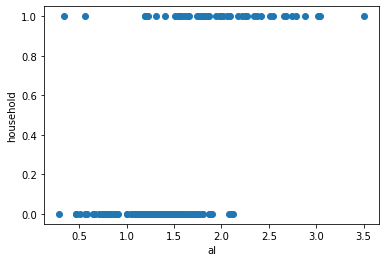

In [5]:
plt.scatter(df.al, df.household)
plt.xlabel('al')
plt.ylabel('household')

**Create Train/Test Split**

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['al']],df.household,train_size=0.7)

## Part 1: Predicting with Linear Regression
***

**Create and Train Linear Regression Model**

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
# Fit the model
linear_model = LinearRegression()
linear_model = linear_model.fit(X_train, y_train)

**Predict with Linear Regression Model**

In [9]:
# Create a seperate table to store predictions
glass_df = X_train[['al']]
glass_df['household_actual'] = y_train

# Predict with Linear Regression
glass_df['household_pred_linear'] = linear_model.predict(X_train)

**Observe Linear Regression Predictions**

Notice how there are some numbers below 0 and above 1 (NOT GOOD)

In [10]:
# Examine the first 15 linear regression predictions
linear_model.predict(X_train)

array([ 0.18048649,  0.29426857,  0.29426857, -0.03223654,  0.34373904,
        0.28437447, -0.07675996,  0.25963924,  0.13101602,  0.49215045,
        1.03632563,  0.29426857,  0.15575125, -0.02234244,  0.52183273,
        0.14091011,  0.43278589,  0.85823193, -0.02728949, -0.02234244,
        0.15575125,  0.29426857,  0.45257407,  0.16564534,  0.31405676,
        0.16564534,  0.30910971,  0.12112192,  0.21511582,  0.29426857,
        0.17059239,  0.0765985 ,  0.12112192,  0.23985105,  0.1606983 ,
       -0.09654815,  0.12606897,  0.91264945,  0.23985105,  0.30416266,
        0.13101602,  0.17553944,  0.23985105, -0.05697177,  0.02712803,
        0.51688569,  0.20027467,  0.20522172,  0.14091011,  0.37836837,
       -0.32411231,  0.34868609,  0.17059239,  0.20522172,  0.16564534,
        0.2447981 ,  0.08649259,  0.11122783,  0.77413213,  0.60593253,
       -0.03718358, -0.29937708,  0.33384494,  0.84833784,  0.30416266,
        0.18543353,  0.08154554,  0.14585716,  0.20027467,  0.11

### Plot Linear Regression

What is the problem here?
- Linear regression is making predictions outside the range of 0 and 1

<AxesSubplot:xlabel='al', ylabel='household_actual'>

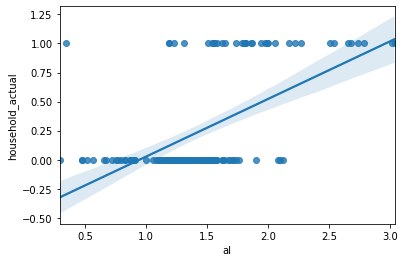

In [11]:
# Plot Linear Regression Line
sns.regplot(x='al', y='household_actual', data=glass_df, logistic=False)

## Part 2: Predicting with Logistic Regression
***

**Create and Train Logistic Regression Model**

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
# Fit logistic regression model
logistic_model = LogisticRegression(class_weight='balanced')
logistic_model = logistic_model.fit(X_train, y_train)

### Predict Class Probabilities & Class Predictions

Logistic Regression allows you to make two types of predictions:
    1. Hard Predictions: Using the predict() will output the class predictions
    2. Soft Predictions: Using the predict_proba() will output the class probabilities

**Hard Prediction (Class Label)**

Class Labels:
- Negative class is 0
- Positive class is 1

In [14]:
# Make class label predictions
logistic_model.predict(X_train)[:15]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

**Soft Prediction (Probability Scores)**

Class Probabilities:
- First column is the predicted probability of **class 0**
- Second column is the predicted probability of **class 1**

In [15]:
# Make class probability predictions
logistic_model.predict_proba(X_train)[:15]

array([[0.6664568 , 0.3335432 ],
       [0.52033648, 0.47966352],
       [0.52033648, 0.47966352],
       [0.86225608, 0.13774392],
       [0.45408481, 0.54591519],
       [0.53357563, 0.46642437],
       [0.88826791, 0.11173209],
       [0.56642752, 0.43357248],
       [0.72267579, 0.27732421],
       [0.272715  , 0.727285  ],
       [0.01979822, 0.98020178],
       [0.52033648, 0.47966352],
       [0.69529417, 0.30470583],
       [0.85582547, 0.14417453],
       [0.24227751, 0.75772249]])

In [16]:
# Predict with Logistic Regression
glass_df['household_pred_log'] = logistic_model.predict(X_train)

# Predict Probability with Logistic Regression
glass_df['household_pred_prob_log'] = logistic_model.predict_proba(X_train)[:,1]

### Plot Logistic Regression

This is a lot better. Logistic Regression outcomes are within the range of 0 and 1.

<AxesSubplot:xlabel='al', ylabel='household_actual'>

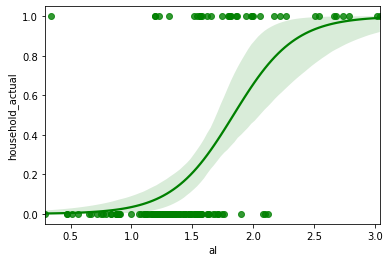

In [17]:
# Plot logistic regression line 
sns.regplot(x='al', y='household_actual', data=glass_df, logistic=True, color='g')

## Part 3: Examine and Compare Predictions
***

- **Linear Regression** will predict continuous outcomes and may be outside the range of 0 and 1
- **Logistic Regression** can predict:
    - Class Labels (0 or 1)
    - Class Probabilities (0~1)

**Examine Prediction Outcomes**

In [18]:
# Examine the table
glass_df.head(10)

,al,household_actual,household_pred_linear,household_pred_log,household_pred_prob_log
190,1.31,1,0.180486,0,0.333543
3,1.54,0,0.294269,0,0.479664
139,1.54,0,0.294269,0,0.479664
63,0.88,0,-0.032237,0,0.137744
140,1.64,0,0.343739,1,0.545915
73,1.52,0,0.284374,0,0.466424
49,0.79,0,-0.076760,0,0.111732
120,1.47,0,0.259639,0,0.433572
26,1.21,0,0.131016,0,0.277324
213,1.94,1,0.492150,1,0.727285


## Part 4: Model Evaluation
***

**Predict on test set**

In [19]:
# Observe class predictions on test set
y_pred = logistic_model.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [20]:
np.array(y_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [21]:
from sklearn import metrics
# Print Confusion Matrix.from sklearn import metrics
# Print Confusion Matrix
print (metrics.accuracy_score(y_test, y_pred))

0.8461538461538461


In [22]:
# Store predictions
predicted = logistic_model.predict(X_test)

### Confusion Matrix
- **True Positive (TP)**: You predict it is household glass and it is
- **True Negative (TN)**: You predict it is not household glass and it is not
- **False Positive (FP)**: You predict it is household glass, but it is not
- **False Negative (FN)**: You predict it is not household glass, but it is

<img src='https://computersciencesource.files.wordpress.com/2010/01/conmat.png'>

### Classification Report (Precision/Recall)
- **Precision**: Focuses on your predictions. It is measuring what fraction of your predictions for the positive class are valid. It is formulated by (TP/TP+FP).
- **Recall**: Focuses on all of the possible positive classes. It's telling you how often your predictions actually capture the positive class. It is formulated by (TP/TP+FN).
- **F1-Score**: Tells you the accuracy of the classifier in classifying the data points in that particular class compared to all other class. It is calculated by taking the harmonic mean of precision and recall.
- **Support**: The support is the number of samples of the true response that lies in that class.


### So...Recall or Precision?

It depends on how much cost/weight you want on your two types of errors: (1) **False Positives** or (2) **False Negatives**

What's the coset of having a FN and FP?

**Optimize Recall When:**
- You want to limit false negatives 
- You will get more False Positives
- When you want to peanlize FN more than FP
- Example: Predicting Cancer Patients or Credit Card Fraud

**Optimize Precision When:**
- You want to limit false positives 
- When you want to peanlize FP more than FN
- Example: Spam VS Not Spam

In [23]:
from sklearn import metrics
# Print Confusion Matrix
print (metrics.confusion_matrix(y_test, predicted))

[[42  8]
 [ 2 13]]


In [24]:
print (metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89        50
           1       0.62      0.87      0.72        15

    accuracy                           0.85        65
   macro avg       0.79      0.85      0.81        65
weighted avg       0.88      0.85      0.85        65



## Part 4: Logistic Regression Review
***

**Linear Regression Equation**: y=β0+β1x
- Continuous response is modeled as a linear combination of the features

**Logistic Regression Equation**: log(p/1−p)=β0+β1x
- Log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:

**Summary:**
- Logistic regression outputs the probabilities of a specific class
- Those probabilities can be converted into class predictions
- It squishes the linear regression line into an "s" shape
- Output is bounded by 0 and 1

## Part 5: Interpretting Logistic Regression Coefficients
***

**Fit Logistic Regression on all Features**

In [25]:
# Let's use the statsmodel library 
import statsmodels.api as sm

# Define independent variables
iv = ['ri','na','mg','al','si','k','ca','ba','fe']

# Fit the logistic regression function
logReg = sm.Logit(df.household,df[iv])
answer = logReg.fit()

Optimization terminated successfully.
         Current function value: 0.133979
         Iterations 10


**Display Parameter Coefficients**

Let's focus on **Aluminum (al)**:

We can interpret this as follows - For a **1 unit increase in aluminum** we expect the **odds of it being a household glass** to increase by almost **two times (96%)**, holding everything else constant. 

In [26]:
# Display the parameter coefficients 
np.exp(answer.params)

ri    6.809344e-22
na    2.144886e+00
mg    1.137911e-01
al    1.960243e+02
si    2.411822e+00
k     3.884092e-01
ca    6.799209e-01
ba    1.906156e+00
fe    1.726505e-04
dtype: float64

## Part 5: Exercise
***

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.
1. Perform some Exploratory Data Analysis (EDA) to find which features have an impact on the target feature (employee turnover).
2. Plot the distribution of employee satisfaction, evaluation, and average monthly hours. 
3. Plot the distribution of the different departments with turnover/non-turnover employees
4. Now build logistic regression model using all the features or features that you found were relevant.
5. Measure the accuracy of the model

In [29]:
df.glass_type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: glass_type, dtype: int64